Arjun Remeshkumar Nair - ML - HW5

In [1]:
#Loading required libraries
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

####### Question 1

In [2]:
#Reading the dataset
madelon = pd.read_csv('C:/Users/arjun/Desktop/UC Davis/Winter Quarter/BAX 452 - Machine Learning/Homework 5/madelon.csv')

#Removing the first column
madelon.drop('Unnamed: 0', axis = 1, inplace = True)

#Checking for missing values
if madelon.isna().any().any():
    print("NA values are present\n")
else:
    print("No NA values present\n")

#Scaling the values to a scale of 0 to 1
scaled_madelon = (madelon - madelon.mean()) / madelon.std()

#Printing the dataset info
print(madelon.info(),"\n")

#Defining the number of clusters
k = [4,8,16,32,64]

#Defining a variable to store the SSE
SSE = []

#Defining a for loop to run the clustering models
for i in range(5):
    kmeans = KMeans(n_clusters = k[i], init='k-means++')
    kmeans.fit(scaled_madelon)
    SSE.append(kmeans.inertia_)


SSE_old = SSE

#Checking the SSE values
print("The SSE values for each of the clustering algorithms are as :\n",SSE)

No NA values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 500 entries, V1 to V500
dtypes: int64(500)
memory usage: 9.9 MB
None 

The SSE values for each of the clustering algorithms are as :
 [1277315.6428594713, 1267436.7739054856, 1259619.784280127, 1250618.826192757, 1232622.9340739204]


1. 
I removed the initial column, checked for NA values and then scaled the values, 0 to 1.

Scaling is necessary here since k-means is an algorithm that uses Euclidean distances and variables with exremely high magnitudes will severely bias the distance measures and the algorithm will give biased results.

2. 
In the case above, we observe that the SSE values are consistently decreasing as we increase the number of clusters.

If the number of clusters is too low, then the algorithm may fail to capture the underlying structure of the data and the clusters may be too broad or too general.
If the number of clusters is too high, the algorithm may overfit the data and create too many clusters, which may not be useful or meaningful.

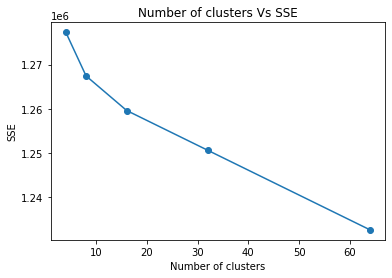

In [3]:
#3.
#Creating a plot of the number of clusters Vs SSE
plt.plot(k, SSE, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Number of clusters Vs SSE')
plt.show()

3. 
I would choose a k-value around 9 for this case.

Ideally, we can choose the smallest value of k for which a major portion of the variation is captured. If we observe the plot of number of clusters Vs SSE, we could approximately take the elbow point of the curve as the optimal number of clusters.

In [4]:
#4.

#Running the k-means with cluster = 9
kmeans = KMeans(n_clusters = 9, init='k-means++')
kmeans.fit(scaled_madelon)
SSE = kmeans.inertia_

#Running the k-means with random centroids
kmeans_random = KMeans(n_clusters = 9, init='random')
kmeans_random.fit(scaled_madelon)
SSE_random = kmeans_random.inertia_

#Comparing the two algorithms
print('SSE for kmeans++ initialization: ' + str(SSE))
print('SSE for random initialization: ' + str(SSE_random))


SSE for kmeans++ initialization: 1266168.8881748244
SSE for random initialization: 1266344.7712054914


4. 
We observe that the SSE for both the algorithms seem to be approximately similar. This implies that even though we have kept the centroids random, there is not much difference in the accuracy of the algorithms.

5. 
Some of the commonly used evaluation metrics are:

Silhouette Score: Similarity of an object to its own cluster compared to other clusters. Ranges from -1 to 1, where a value of 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters.

Calinski-Harabasz Index: Ratio of the between-cluster variance to the within-cluster variance. A higher index indicates better-defined clusters.

Davies-Bouldin Index: Average similarity between each cluster and its most similar cluster. A lower index indicates better separation between clusters.

Dunn Index: Ratio of the minimum distance between clusters to the maximum diameter of the clusters. A higher index indicates better separation between clusters.

Elbow Method: Helps to identify the optimal number of clusters by plotting the variance explained as a function of the number of clusters. The point at which the curve starts to level off is considered the optimal number of clusters.

####### Question 2

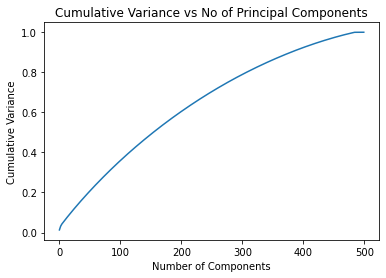

Number of components required to capture 75% of the variance: 277



In [5]:
#1.
#Fitting the scaled features to PCA
pca = PCA()
pca.fit(scaled_madelon)

#Creating the cumulative variance plot
c_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(c_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance vs No of Principal Components')
plt.show()

#Calculate the number of compoonents for capturing 75% of the variance
num_comp = range(1,501)[np.argmin(np.abs(c_var - 0.75))]
print(f'Number of components required to capture 75% of the variance: {num_comp}\n')

1. 
In order to capture 75% of the variation, we should ideally include 277 features. This means, we should only include 277 features out of 500.

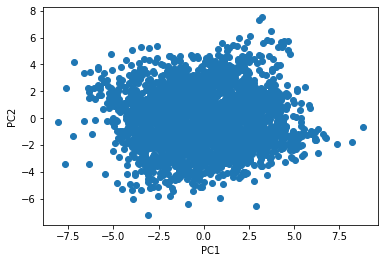


We observe that the a majority of the data points are clustered together, meaning that introducing PC1 and PC2 have drastically improved the variance explanation.



In [6]:
#2.1
p_comp = pca.fit_transform(scaled_madelon)

#Plotting the transformed data on the first two Principle Components
plt.scatter(p_comp[:, 0], p_comp[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print("\nWe observe that the a majority of the data points are clustered together, meaning that introducing PC1 and PC2 have drastically improved the variance explanation.\n")


The top 2 variables are :  V339 , V282 



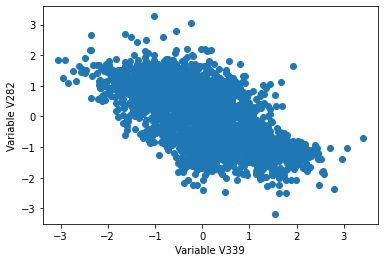

In [7]:
#2.2
#Extracting the loadings for PC1 and PC2
loadings = pd.DataFrame(abs(pca.components_.T[:,0:2]), columns = ['PC1', 'PC2'], index = scaled_madelon.columns)

#Creatign sum of loadings
loadings['Sum'] = loadings.PC1 + loadings.PC2

#Sorting for the largest
loadings.sort_values(by='Sum', ascending=False,inplace = True)

#Extracting the top 2 variables
top_2_loadings = loadings.index.tolist()[0:2]

print("\nThe top 2 variables are : ",top_2_loadings[0],",",top_2_loadings[1],"\n")

#Plot the original data on a graph with the two original variables
plt.scatter(scaled_madelon[top_2_loadings[0]], scaled_madelon[top_2_loadings[1]])
plt.xlabel(f"Variable {top_2_loadings[0]}")
plt.ylabel(f"Variable {top_2_loadings[1]}")
plt.show()


3. 
We cannot observe any well defined clusters from the above graph, meaning that we would need to include more features in order to explain the data.

Since the current dataset has 500 features, it might not be easy to interpret clusters using only 2 features and plots.

####### Question 3

In [8]:
#Transforming the data based on pca 
pca_madelon = pca.transform(scaled_madelon)[:, :num_comp]

#Defining a variable to store the SSE
SSE_new = []

#Defining a for loop to run the clustering models
for i in range(5):
    kmeans = KMeans(n_clusters = k[i], init='k-means++')
    kmeans.fit(pca_madelon)
    SSE_new.append(kmeans.inertia_)

#Checking the SSE values
print("The SSE values for each of the clustering algorithms are as :\n",SSE_new)

The SSE values for each of the clustering algorithms are as :
 [952670.4470076752, 943243.2714890706, 935895.1449766255, 925364.4656433838, 910983.9121172538]


1. 
It is a good idea to run k-means clustering on PCA transformed data mainly due to the following reasons:

Dimensionality reduction: High dimensional data is computationally heavy and as such, dimensionality reduction helps the clustering algorithm to be implemented effectively and quickly.

Improved interpretability: It is easier to visualize the data and find patterns when the data is plotted on fewer dimensions.

Increased accuracy: It helps in better cluster separation and hence higher accuracy of prediction

Reduced sensitivity to outliers

Clustering algorithm can be implemented quickly

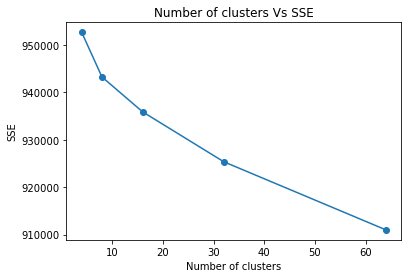

In [9]:
#2.
#Creating a plot of the number of clusters Vs SSE
plt.plot(k, SSE_new, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Number of clusters Vs SSE')
plt.show()

2.1 
I would choose the optimal k as 9.

This is the same vaue as what we found earlier.

In [10]:
#2.2
#Checking the SSE values - old
print("The SSE values for each of the clustering algorithms are as :\n",SSE_old)

#Checking the SSE values - new
print("The SSE values for each of the clustering algorithms are as :\n",SSE_new)

The SSE values for each of the clustering algorithms are as :
 [1277315.6428594713, 1267436.7739054856, 1259619.784280127, 1250618.826192757, 1232622.9340739204]
The SSE values for each of the clustering algorithms are as :
 [952670.4470076752, 943243.2714890706, 935895.1449766255, 925364.4656433838, 910983.9121172538]


2.2 
We observe that there is a considerable decrease in the SSE values between the algorithm on original data and PCA transformed dataset.

We also observe that the SSE decreases more drastically when using the transformed data.

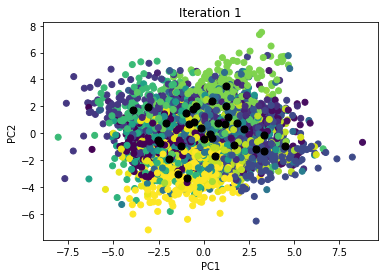

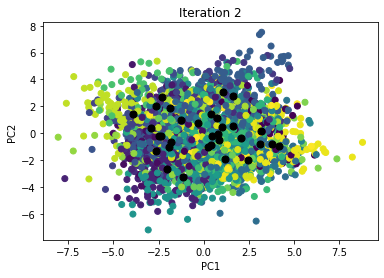

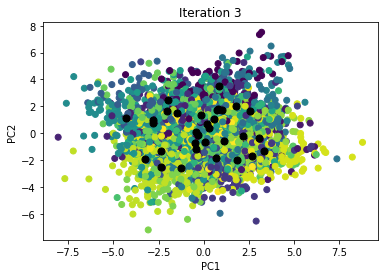

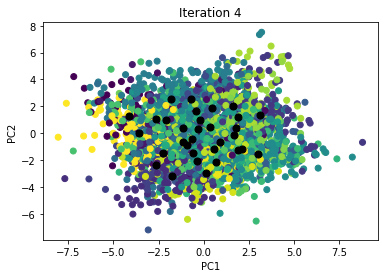

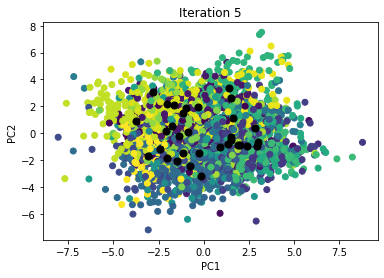

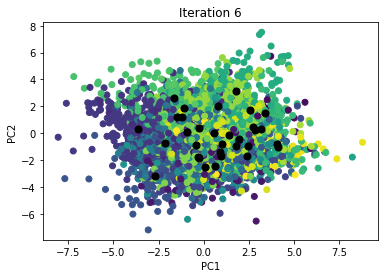

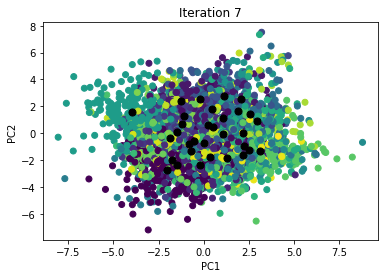

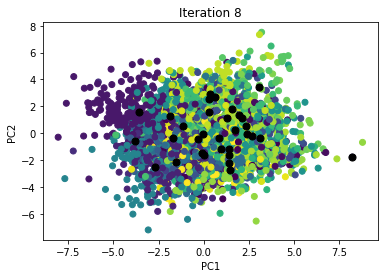

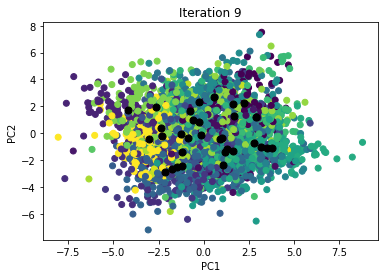

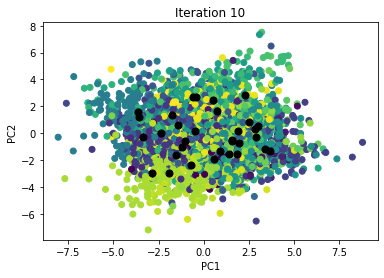

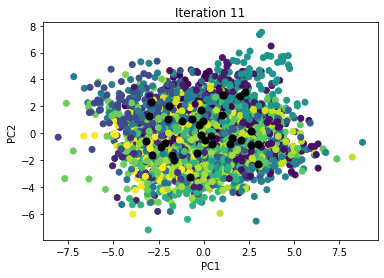

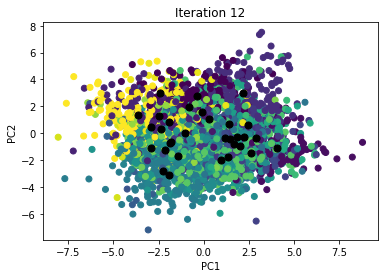

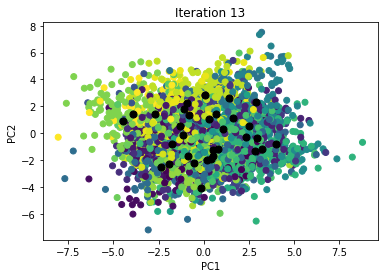

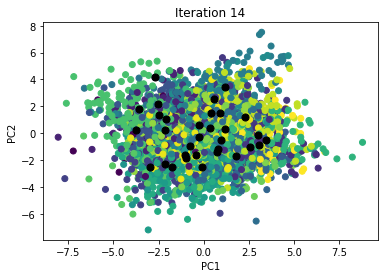

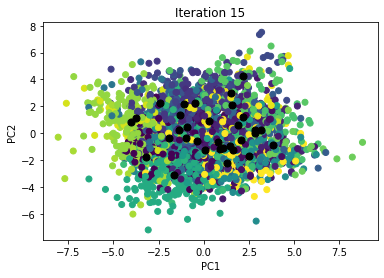

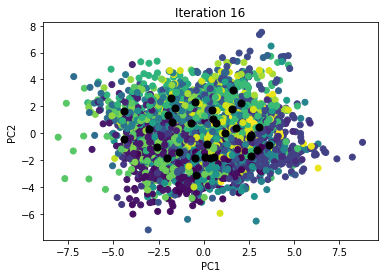

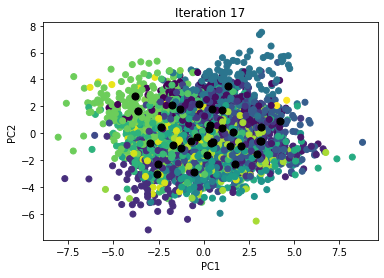

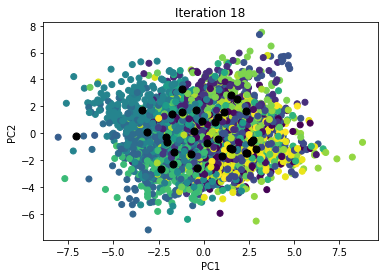

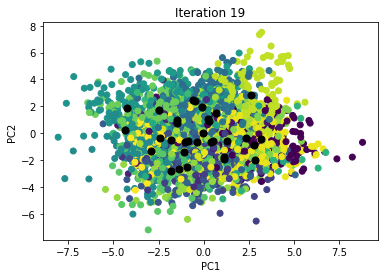

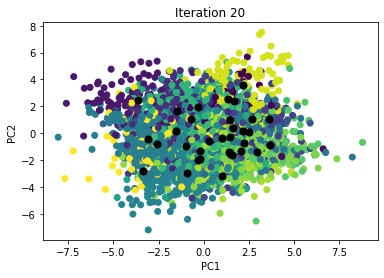

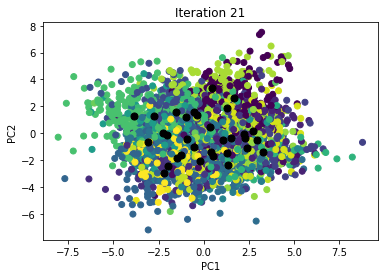

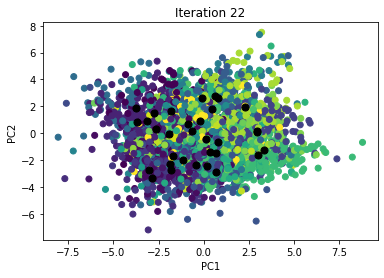

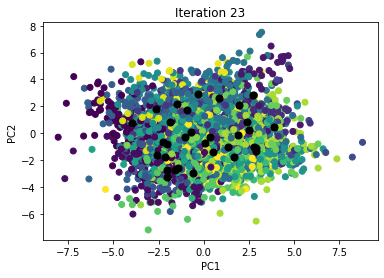

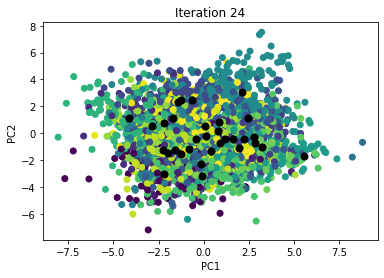

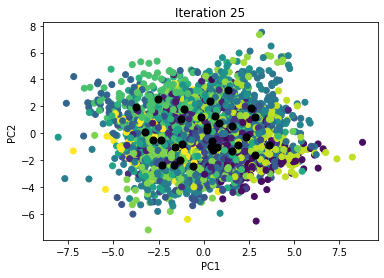

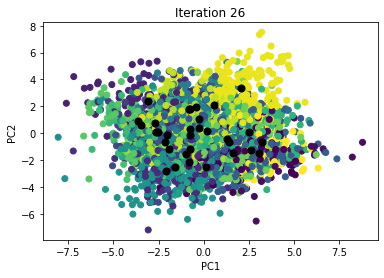

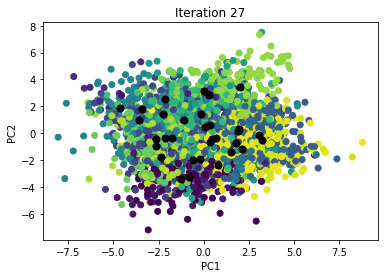

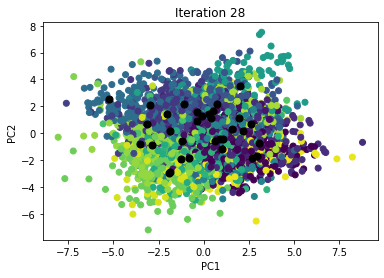

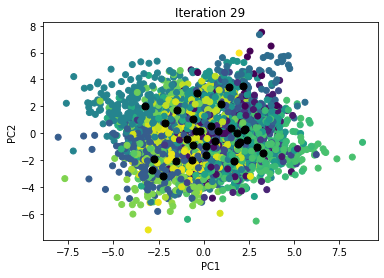

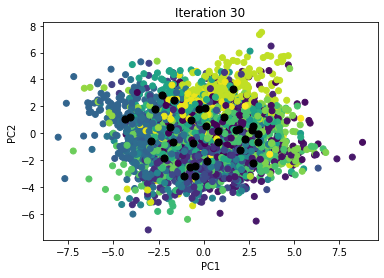

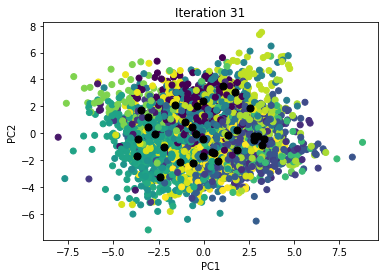

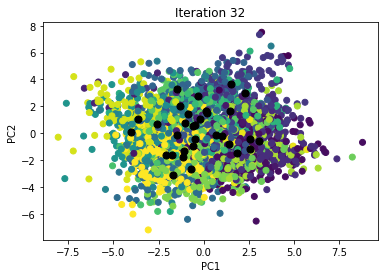

In [11]:
#3.

#Running the k-means with cluster = 32
kmeans = KMeans(n_clusters = 32, init='random')

# perform clustering for the first 5 iterations
for i in range(32):
    kmeans.fit(pca_madelon)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    #Creating a scatter plot of PC1 vs. PC2, color-coded by cluster assignment
    plt.scatter(pca_madelon[:, 0], pca_madelon[:, 1], c = labels)
    
    #Labelling the cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='black')
    
    plt.title(f"Iteration {i+1}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

3. 
It is very hard to visualize however, we can see that as each iteration executes, the centers are moving and converging to an optimal position.

I have displayed the plots for 32 iterations and we can clearly observe that the centers do converge to their optimal assignments.